In [1]:
# Web scraper for KanView website that provides payroll data for the state of Kansas
# Selenium is used to handle the javascript on a website

#Importing libraries
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import re
import pandas as pd
import os     #to manipulate files



In [81]:
chrome_path = r'C:\Users\Abraham\Downloads\Apps\chromedriver'
# prepend it with r because of the backslash characters

driver = webdriver.Chrome(chrome_path) # This will open up a chrome window

page = 2557
url = "https://forums.edmunds.com/discussion/18576/general/x/edmunds-members-cars-conversations/p" + str(page)

driver.get(url)  # Open that website


In [82]:
userlist = []
datelist = []
postlist = []
quotelist = []
while len(postlist)<5000:
    #User
    users = driver.find_elements_by_class_name('Username')
    for user in users:
        userlist.append(user.text)
    
    #Date
    dates = driver.find_elements_by_class_name('DateCreated')
    for date in dates:
        datelist.append(date.text)
    
    # This is the list of all the comments
    posts = driver.find_elements_by_class_name('Item-Body')
    for post in posts:
        postlist.append(post.text)

    # This is the list of the blockquotes that you don't want
    quotes = driver.find_elements_by_class_name('Quote')
    for quote in quotes:
        quotelist.append(quote.text)
        
    page = page - 1
    url = "https://forums.edmunds.com/discussion/18576/general/x/edmunds-members-cars-conversations/p" + str(page)

    driver.get(url)
    


In [84]:
# Now you have to delete quotes from the posts
for j in range(0,len(quotelist)):
    for i in range(0,len(postlist)):
        if (quotelist[j] in postlist[i]):
            postlist[i]=postlist[i].replace(quotelist[j],'')   

In [83]:
len(postlist)

5007

In [85]:
df_raw = pd.DataFrame(datelist)
df_raw['Users'] = userlist
df_raw['Text'] = postlist
df_raw.columns = ['Date','User','Text']

In [86]:
df_raw

,Date,User,Text
0,September 26,snakeweasel,\nI went and checked and yes the 59k one is an...
1,September 26,snakeweasel,\nI would have told them that I used to but I ...
2,September 26,bwia,"\nNo, it can't be otherwise the transactions w..."
3,September 26,Mr_Shiftright,stickguy said:\nfunction is not reliability. S...
4,September 26,imidazol97,\nshow previous quotes\n\n\n\nI would have tol...
5,September 26,oldfarmer50,driver100 said:\nI hear lots of Honda and Toyo...
6,September 26,ab348,"I had a Volvo (well, Dad's, but I was the only..."
7,September 26,henryn,bwia said:\nshow previous quotes\n\n\n\n\n\nDo...
8,September 26,ab348,"Back on the TV topic, I got to watch New Amste..."
9,September 26,PF_Flyer,"So, we are SO attached to our vehicles, it's a..."


In [88]:
postfile_name = r'C:\Users\Abraham\MSBA\Text\HW2\postfile.csv'
df_raw.to_csv(postfile_name)

# 3

In [235]:
import pandas as pd
posts=pd.read_csv('postfile.csv',encoding='cp1252')

In [236]:
posts = posts.replace(r'\n',' ', regex=True)
posts = posts.replace(r'\r',' ', regex=True)
posts.head(2)

,Unnamed: 0,Date,User,Text
0,0,Sep-26,snakeweasel,I went and checked and yes the 59k one is an...
1,1,Sep-26,snakeweasel,I would have told them that I used to but I ...


In [237]:
import nltk
import re
from nltk.tokenize import sent_tokenize, word_tokenize

In [73]:

# Concatenating entire text
all_text=posts['Text'].str.cat(sep=' ')

# Remove punctuation, digits & others, convert to lower and finally stopwords
from string import punctuation
for p in punctuation:
    all_text =all_text.replace(p,'')
all_text =re.sub('[0-9]+','',all_text)
all_text=all_text.lower()
all_text_list =re.findall('\w+',all_text)


from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english'))
all_text_list_clean = [w for w in all_text_list if not w in stop_words]


In [53]:
nltk.FreqDist(['I', 'am' ,'just' ,'a' ,'little' ,'girl', 'girl'])

FreqDist({'girl': 2, 'I': 1, 'am': 1, 'just': 1, 'a': 1, 'little': 1})

In [104]:
words_in_texts=nltk.FreqDist(all_text_list_clean)

In [105]:
words_in_texts=pd.DataFrame.from_dict(words_in_texts, orient='index', columns=['freq']).sort_values(by='freq', ascending=False)

In [143]:
car_mapping=pd.read_csv('car-list.csv')

In [147]:
def lowering (s):
    return s.lower()
car_mapping['model']=car_mapping['model'].map(lowering)
car_mapping['brand']=car_mapping['brand'].map(lowering)

In [154]:
check1=pd.Series(words_in_texts.index.values)

In [155]:
check2=pd.Series(car_mapping['model'])

In [156]:
sum(check1.isin(check2))

133

In [157]:
a = ['a', 'b', 'c', 'd', 'b']
b = set(a)

In [159]:
list(b)

['a', 'b', 'd', 'c']

### 3 Task A

In [238]:
from string import punctuation
def unique_words(s):
# Remove punctuation, digits & others, convert to lower and finally stopwords
    s=str(s)
    for p in punctuation:
        s =s.replace(p,'')
    s=s.lower()
    return list(set(re.findall('\w+',s)))

posts['unique_words_list']=posts['Text'].map(unique_words)

In [239]:
# Mapping  to brand

In [240]:
car_mapping=pd.read_csv('car-list.csv')
def lowering (s):
    return s.lower()
car_mapping['model']=car_mapping['model'].map(lowering)
car_mapping['brand']=car_mapping['brand'].map(lowering)

In [244]:
def mentioned_brands(list_1):
    list_i=pd.DataFrame(list_1)
    mask=car_mapping['model'].isin(pd.Series(list_1))
    joiner=car_mapping[mask]
    joined=joiner.merge(list_i, left_on='model', right_on=0)
    out=set(list(joined['brand']))
    return list(out)

posts['unique_brands']=posts['unique_words_list'].map(mentioned_brands)


In [246]:
unique_brands_superlist=posts['unique_brands'].sum()
unique_brands=nltk.FreqDist(unique_brands_superlist)
unique_brands=pd.DataFrame.from_dict(unique_brands, orient='index', columns=['freq']).sort_values(by='freq', ascending=False)

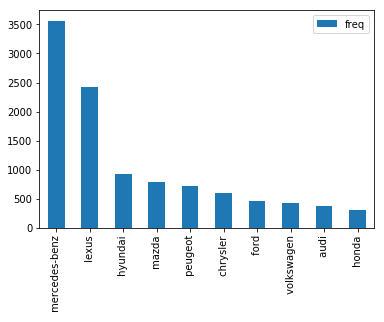

In [252]:
unique_brands[:10].plot(kind='bar')